In [ ]:
import sys
sys.path.insert(0, "C:\\Users\\pgott\\Desktop\\Coding\\smart_coarse_grain\\utils")
import cv2 as cv
import os
from pathlib import Path
import sys
from structure_tensor import smart_structure_tensor
import torch
import numpy as np
import matplotlib.pyplot as plt
import tifffile
baseDir = r"O:/Data upscale train/Raw data/train/"

groundTruthDir = r"O:/Data upscale train/Dataset/train/target/"
if not os.path.exists(groundTruthDir):
    os.mkdir(groundTruthDir)

inputDir = r"O:/Data upscale train/Dataset/train/input/"
if not os.path.exists(inputDir):
    os.mkdir(inputDir)

for coarseGrainingLength in [4, 8, 16]: #train one model
    for file in os.listdir(baseDir):
        img = cv.imread(baseDir + file)
        if np.max(img.shape) < 2500: # to fit in GPU memory
            img = np.mean(img, axis=2)
            img_tensor = torch.from_numpy(img)
            img_tensor = img_tensor.float()
            theta = smart_structure_tensor(
            img_tensor.unsqueeze(0).unsqueeze(0),
            coarseGrainAverage="gaussian",
            coarseGrainingLength=coarseGrainingLength,
            downsample=1,)
            stride = int(coarseGrainingLength/2)
            if not os.path.exists(groundTruthDir + "_upscaleFactor" + str(stride) + "/"):
                os.mkdir(groundTruthDir + "_upscaleFactor" + str(stride) + "/")
            

            if not os.path.exists(inputDir + "_upscaleFactor" + str(stride) + "/"):
                os.mkdir(inputDir + "_upscaleFactor" + str(stride) + "/")
                
            tifffile.imwrite(groundTruthDir + "_upscaleFactor" + str(stride) + "/" + file, theta.numpy())
            tifffile.imwrite(inputDir + "_upscaleFactor" + str(stride) + "/" + file, theta[::stride, ::stride].numpy())


tensor([[1.0393, 1.5371, 1.5493,  ..., 1.5666, 1.3714, 1.4192],
        [1.5409, 1.4179, 1.4228,  ..., 0.3897, 1.5694, 1.5701],
        [1.4921, 1.4139, 1.4069,  ..., 0.3221, 1.5680, 1.5693],
        ...,
        [1.5689, 0.2492, 1.4918,  ..., 1.4609, 1.5690, 1.5695],
        [1.3717, 1.5694, 1.5681,  ..., 1.5699, 0.0374, 1.4586],
        [1.4158, 1.5700, 1.5692,  ..., 1.5702, 1.4586, 0.0069]])


In [26]:
print(theta.shape*2 == theta[::stride, ::stride].shape)

print(theta.shape)
print(theta[::stride, ::stride].shape)

print(stride)

False
torch.Size([1347, 2244])
torch.Size([169, 281])
8


(array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 5.000e+00, 2.200e+01,
         4.910e+03],
        [1.320e+02, 2.270e+02, 2.670e+02, ..., 5.540e+02, 8.270e+02,
         1.431e+03],
        [1.130e+02, 2.460e+02, 2.740e+02, ..., 5.680e+02, 8.040e+02,
         1.215e+03],
        ...,
        [7.500e+01, 1.270e+02, 1.300e+02, ..., 3.470e+02, 4.870e+02,
         1.622e+03],
        [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
         5.061e+03],
        [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
         5.062e+03]], shape=(5063, 10)),
 array([2.40695430e-04, 1.57296285e-01, 3.14351857e-01, 4.71407443e-01,
        6.28463030e-01, 7.85518646e-01, 9.42574203e-01, 1.09962976e+00,
        1.25668538e+00, 1.41374099e+00, 1.57079661e+00]),
 <a list of 5063 BarContainer objects>)

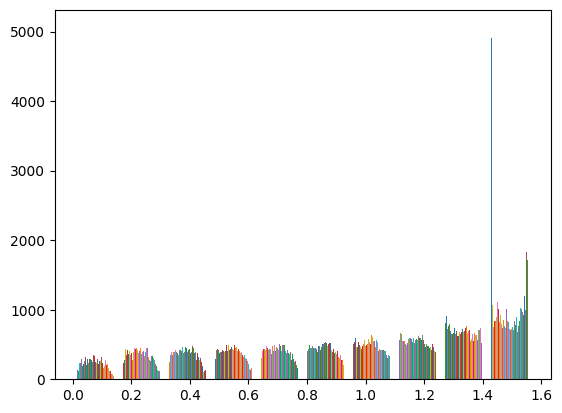

In [27]:
plt.hist(theta)